### import librerie


In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D, Flatten, Dropout
from keras.layers import MaxPooling2D
import pandas as pd
from keras.callbacks import History, EarlyStopping 
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


### import datasets

In [0]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
Y_train.shape

(60000,)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
Y_test.shape

(10000,)

La cifra nell'immagine è un 5


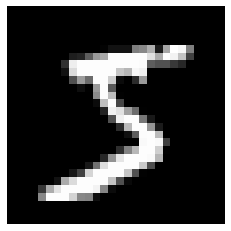

In [0]:
plt.imshow(X_train[0].reshape([28,28]), cmap="gray")
plt.axis('off') # rimuoviamo i valori sulle assi 
print("La cifra nell'immagine è un %d" % Y_train[0])

normalizzation and reshaping

In [0]:
num_classes=10

y_train = to_categorical(Y_train, num_classes)
y_test = to_categorical(Y_test, num_classes)

Y_train[0]

5

In [0]:
x_train = X_train/255
x_test = X_test/255

In [0]:
x_train = X_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = X_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train.shape

(60000, 28, 28, 1)

### model

In [0]:
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2, strides=2,padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.1))
model.add(Conv2D(filters=4, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2,padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(44, activation='relu'))


model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 13, 10)        40        
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 4)         364       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 4)           0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 6, 6, 4)          

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="RMSprop", metrics=['accuracy'])


In [0]:

network_history=model.fit(x_train, y_train, batch_size=512, validation_split=0.2, epochs=50)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 54us/step - loss: 0.8355 - acc: 0.7460 - val_loss: 0.2285 - val_acc: 0.9329
Epoch 2/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.2228 - acc: 0.9321 - val_loss: 0.1507 - val_acc: 0.9538
Epoch 3/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1506 - acc: 0.9538 - val_loss: 0.1253 - val_acc: 0.9614
Epoch 4/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1229 - acc: 0.9617 - val_loss: 0.1019 - val_acc: 0.9694
Epoch 5/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.1092 - acc: 0.9654 - val_loss: 0.0838 - val_acc: 0.9752
Epoch 6/50
48000/48000 [==============================] - 2s 31us/step - loss: 0.1032 - acc: 0.9675 - val_loss: 0.0710 - val_acc: 0.9790
Epoch 7/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.0946 - acc: 0.9706 - val_loss: 0.0678 - val_acc

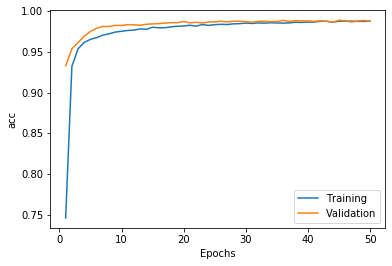

In [0]:
x_plot = list(range(1,51))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.plot(x_plot, network_history.history['acc'])
plt.plot(x_plot, network_history.history['val_acc'])
plt.legend(['Training', 'Validation'])

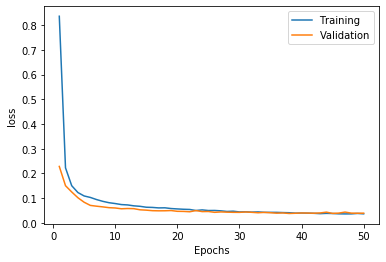

In [0]:
x_plot = list(range(1,51))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(x_plot, network_history.history['loss'])
plt.plot(x_plot, network_history.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [0]:
y_pred=model.predict_classes(x_test)

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 70us/step


[0.03818156121129868, 0.988]

In [0]:
cr=classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
cm=confusion_matrix(Y_test,y_pred)
prf=precision_recall_fscore_support(Y_test,y_pred)

print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")

confusion matrix
 [[ 975    0    0    0    0    0    4    1    0    0]
 [   0 1132    1    0    0    1    1    0    0    0]
 [   2    1 1021    0    2    0    0    4    2    0]
 [   0    1    2  997    0    6    1    2    1    0]
 [   0    0    0    0  978    0    1    0    1    2]
 [   1    0    0    5    0  881    2    1    1    1]
 [   4    2    0    0    3    3  945    0    1    0]
 [   0    4    7    0    0    0    0 1014    1    2]
 [   1    0    4    3    0    3    2    4  951    6]
 [   0    1    1    1    9    3    0    6    2  986]]
precision
 [0.99186165 0.99211218 0.98552124 0.99105368 0.9858871  0.98216276
 0.98849372 0.98255814 0.990625   0.9889669 ]
recall
 [0.99489796 0.99735683 0.98934109 0.98712871 0.99592668 0.98766816
 0.98643006 0.98638132 0.97638604 0.97720515]
f-score
 [0.99337748 0.99472759 0.98742747 0.9890873  0.99088146 0.98490777
 0.98746082 0.98446602 0.98345398 0.98305085]
